# Optical Identification of GRBs Using Machine Learning Techniques on Simulated Data 

## Exploratory Data Analysis

### Importing Data & Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import shutil 
faint_path = '/Users/jeremypalmerio/Repos/VTAC_ML/data/combined_qpo_vt_faint_case_with_GRB_with_flags.parquet'
bright_path = '/Users/jeremypalmerio/Repos/VTAC_ML/data/combined_qpo_vt_with_GRB.parquet'
data_faint = pd.read_parquet(faint_path, engine='fastparquet')
data_bright = pd.read_parquet(bright_path, engine='fastparquet')
data.head()


In [83]:
data_faint['IS_GRB'].value_counts()

IS_GRB
0    250150
1       846
Name: count, dtype: int64

In [ ]:
data_bright['IS_GRB'].value_counts()

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class OneHotEncoderCustom(BaseEstimator, TransformerMixin):
    # take from https://medium.com/@benlc77/how-to-write-clean-and-scalable-code-with-custom-transformers-sklearn-pipelines-ecb8e53fe110
    def __init__(self, variables):
        self.variables = variables
        self.ohe = OneHotEncoder(handle_unknown='ignore')

    def fit(self, X, y=None):
        X_ = X.loc[:, self.variables]
        self.ohe.fit(X_)
        return self

    def transform(self, X):
        X_ = X.loc[:, self.variables]
        # get one-hot encoded feature in df format
        X_transformed = pd.DataFrame(self.ohe.transform(X_).toarray(), columns=self.ohe.get_feature_names_out())

        # Remove columns that are one hot encoded in original df
        X.drop(self.variables, axis=1, inplace=True)

        # Add one hot encoded feature to original df
        X[self.ohe.get_feature_names_out()] = X_transformed[self.ohe.get_feature_names_out()].values
        return X


In [68]:
ohe = OneHotEncoderCustom(variables=["CASE"])
ohe.fit(data)
ohe.transform(data)


,VT_ID,RA,DEC,MAGCAL_R0,MAGCAL_R1,MAGCAL_R2,MAGCAL_R3,MAGCAL_B0,MAGCAL_B1,MAGCAL_B2,...,SEQFLAG1,SEQFLAG2,SEQFLAG3,IS_GRB,SIM_ID,CASE_bright_case1,CASE_bright_case1a,CASE_bright_case2,CASE_bright_case3,CASE_bright_case4
0,1,142.660568,42.577675,12.94,12.97,12.96,12.97,13.39,13.35,13.35,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
1,2,142.615478,42.549900,13.06,13.04,13.02,13.04,13.59,13.58,13.58,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
2,13,142.624680,42.599564,13.31,13.27,13.27,13.31,19.78,19.80,19.78,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
3,3,142.644562,42.573009,14.76,14.71,14.72,14.72,15.21,15.22,15.21,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
4,4,142.671173,42.606564,14.96,14.95,14.97,14.98,15.45,15.46,15.45,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313793,158,162.305435,32.411057,NaN,NaN,NaN,NaN,22.76,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313794,170,162.343735,32.406399,NaN,NaN,NaN,NaN,23.03,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313795,175,162.249618,32.405460,NaN,NaN,NaN,NaN,23.03,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313796,177,162.255234,32.399235,NaN,NaN,NaN,NaN,22.91,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0


In [69]:
data

,VT_ID,RA,DEC,MAGCAL_R0,MAGCAL_R1,MAGCAL_R2,MAGCAL_R3,MAGCAL_B0,MAGCAL_B1,MAGCAL_B2,...,SEQFLAG1,SEQFLAG2,SEQFLAG3,IS_GRB,SIM_ID,CASE_bright_case1,CASE_bright_case1a,CASE_bright_case2,CASE_bright_case3,CASE_bright_case4
0,1,142.660568,42.577675,12.94,12.97,12.96,12.97,13.39,13.35,13.35,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
1,2,142.615478,42.549900,13.06,13.04,13.02,13.04,13.59,13.58,13.58,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
2,13,142.624680,42.599564,13.31,13.27,13.27,13.31,19.78,19.80,19.78,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
3,3,142.644562,42.573009,14.76,14.71,14.72,14.72,15.21,15.22,15.21,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
4,4,142.671173,42.606564,14.96,14.95,14.97,14.98,15.45,15.46,15.45,...,22222,32222,42222,0,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313793,158,162.305435,32.411057,NaN,NaN,NaN,NaN,22.76,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313794,170,162.343735,32.406399,NaN,NaN,NaN,NaN,23.03,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313795,175,162.249618,32.405460,NaN,NaN,NaN,NaN,23.03,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0
313796,177,162.255234,32.399235,NaN,NaN,NaN,NaN,22.91,NaN,NaN,...,21111,31111,41111,0,364,0.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

class Cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables

    def handle_nans(self, X, y, nans="drop"):
        data = X.join(y)
        if nans == 'drop':
            data = data.dropna()
            X_ = data[self.variables]
            y_ = data.drop(columns=self.variables)
            return X_, y_  # Return the result of dropping missing values
        elif nans == 'impute':
            # Implement imputation strategy if needed
            pass
        elif nans == 'ignore':
            # Implement strategy to ignore missing values if needed
            pass
        else:
            raise ValueError("Invalid value for 'nans' argument.")

    def fit(self, X, y=None):
        return self  # Nothing to fit, just return self

    def transform(self, X, y=None):
        X_ = X.loc[:, self.variables]
        transformed_X, transformed_y = self.handle_nans(X_, y, 'drop')  # Store the transformed data
        return transformed_X, transformed_y  # Return the transformed data


### Exploring Table

In [75]:
print(data.isnull().any())


VT_ID        False
RA           False
DEC          False
MAGCAL_R0     True
MAGCAL_R1     True
MAGCAL_R2     True
MAGCAL_R3     True
MAGCAL_B0     True
MAGCAL_B1     True
MAGCAL_B2     True
MAGCAL_B3     True
MAGERR_R0     True
MAGERR_R1     True
MAGERR_R2     True
MAGERR_R3     True
MAGERR_B0     True
MAGERR_B1     True
MAGERR_B2     True
MAGERR_B3     True
MAGVAR_R1     True
MAGVAR_R2     True
MAGVAR_R3     True
MAGVAR_B1     True
MAGVAR_B2     True
MAGVAR_B3     True
EFLAG_R0      True
EFLAG_R1      True
EFLAG_R2      True
EFLAG_R3      True
EFLAG_B0      True
EFLAG_B1      True
EFLAG_B2      True
EFLAG_B3      True
SEQFLAG0     False
SEQFLAG1     False
SEQFLAG2     False
SEQFLAG3     False
IS_GRB       False
CASE         False
SIM_ID       False
dtype: bool


In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'bright_case1'

In [57]:
X = data.drop(['IS_GRB'], axis=1)
y = data["IS_GRB"]
cln = Cleaner(variables=X.columns)

X, y = cln.transform(X=X, y=y)
print(X.isnull().any(), X.shape)

VT_ID        False
RA           False
DEC          False
MAGCAL_R0    False
MAGCAL_R1    False
MAGCAL_R2    False
MAGCAL_R3    False
MAGCAL_B0    False
MAGCAL_B1    False
MAGCAL_B2    False
MAGCAL_B3    False
MAGERR_R0    False
MAGERR_R1    False
MAGERR_R2    False
MAGERR_R3    False
MAGERR_B0    False
MAGERR_B1    False
MAGERR_B2    False
MAGERR_B3    False
MAGVAR_R1    False
MAGVAR_R2    False
MAGVAR_R3    False
MAGVAR_B1    False
MAGVAR_B2    False
MAGVAR_B3    False
EFLAG_R0     False
EFLAG_R1     False
EFLAG_R2     False
EFLAG_R3     False
EFLAG_B0     False
EFLAG_B1     False
EFLAG_B2     False
EFLAG_B3     False
SEQFLAG0     False
SEQFLAG1     False
SEQFLAG2     False
SEQFLAG3     False
CASE         False
SIM_ID       False
dtype: bool (149351, 39)


In [31]:
def clean_data(data):
    # Get list of numeric column names
    numeric_columns = data.select_dtypes(include=['number']).columns
    
    # Filter DataFrame to keep only numeric columns
   
    
    return data[numeric_columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313798 entries, 0 to 313797
Data columns (total 40 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   VT_ID      313798 non-null  int64  
 1   RA         313798 non-null  float64
 2   DEC        313798 non-null  float64
 3   MAGCAL_R0  229753 non-null  float64
 4   MAGCAL_R1  234744 non-null  float64
 5   MAGCAL_R2  233169 non-null  float64
 6   MAGCAL_R3  234242 non-null  float64
 7   MAGCAL_B0  189306 non-null  float64
 8   MAGCAL_B1  212247 non-null  float64
 9   MAGCAL_B2  212579 non-null  float64
 10  MAGCAL_B3  213286 non-null  float64
 11  MAGERR_R0  229753 non-null  float64
 12  MAGERR_R1  234744 non-null  float64
 13  MAGERR_R2  233169 non-null  float64
 14  MAGERR_R3  234242 non-null  float64
 15  MAGERR_B0  189306 non-null  float64
 16  MAGERR_B1  212247 non-null  float64
 17  MAGERR_B2  212579 non-null  float64
 18  MAGERR_B3  213286 non-null  float64
 19  MAGVAR_R1  212775 non-n

In [3]:
data['CASE'].value_counts()

CASE
bright_case2     64572
bright_case3     64572
bright_case4     62356
bright_case1a    61192
bright_case1     61106
Name: count, dtype: int64

Splitting dataframe by GRB cases: 
- b1 : bright_case1
- b1a : bright_case1a
- b2 : bright_case2
- b3 : bright_case3
- b4 : bright_case4

In [4]:
b1 = data[data['CASE']=='bright_case1'].drop(["CASE"],axis = 1)
b1a = data[data['CASE']=='bright_case1a'].drop(["CASE"], axis = 1)
b2 = data[data['CASE']=='bright_case2'].drop(["CASE"], axis = 1)
b3 = data[data['CASE']=='bright_case3'].drop(["CASE"], axis = 1)
b4 = data[data['CASE']=='bright_case4'].drop(["CASE"], axis = 1)
cases_dict = {'bright_case1':b1,
              'bright_case1a':b1a,
              'bright_case2':b2,
              'bright_case3':b3,
              'bright_case4':b4}

Exploring the distributions of positive and negative classes for 'IS_GRB' columns

In [5]:
for case, sub_data in cases_dict.items():
    drop_counts = list(sub_data.dropna()["IS_GRB"]
                       .value_counts())
    counts = list(sub_data["IS_GRB"].value_counts())
    print(case+"|"+str(drop_counts[0])+"|"+str(drop_counts[1]))
    print(case+"|"+str(counts[0])+"|"+str(counts[1]))


bright_case1|29389|178
bright_case1|60894|212
bright_case1a|29234|180
bright_case1a|60981|211
bright_case2|30139|181
bright_case2|64359|213
bright_case3|30139|181
bright_case3|64359|213
bright_case4|29545|185
bright_case4|62142|214


### Getting Class Weigts


In [116]:
from sklearn.utils.class_weight import compute_class_weight
y = data['IS_GRB']
class_weights = compute_class_weight(
    class_weight="balanced", 
    #class_weight=None, 
    classes=np.unique(y), 
    y=y
    )

class_dict = dict(zip([0, 1], class_weights))
print(class_dict)
y

{0: 0.5016995219594864, 1: 147.60018814675448}


0         0
1         0
2         0
3         0
4         0
         ..
313793    0
313794    0
313795    0
313796    0
313797    0
Name: IS_GRB, Length: 313798, dtype: int64

### Missing Values

In [7]:
print(data.isnull().any())
data = data.copy().dropna()


VT_ID        False
RA           False
DEC          False
MAGCAL_R0     True
MAGCAL_R1     True
MAGCAL_R2     True
MAGCAL_R3     True
MAGCAL_B0     True
MAGCAL_B1     True
MAGCAL_B2     True
MAGCAL_B3     True
MAGERR_R0     True
MAGERR_R1     True
MAGERR_R2     True
MAGERR_R3     True
MAGERR_B0     True
MAGERR_B1     True
MAGERR_B2     True
MAGERR_B3     True
MAGVAR_R1     True
MAGVAR_R2     True
MAGVAR_R3     True
MAGVAR_B1     True
MAGVAR_B2     True
MAGVAR_B3     True
EFLAG_R0      True
EFLAG_R1      True
EFLAG_R2      True
EFLAG_R3      True
EFLAG_B0      True
EFLAG_B1      True
EFLAG_B2      True
EFLAG_B3      True
SEQFLAG0     False
SEQFLAG1     False
SEQFLAG2     False
SEQFLAG3     False
IS_GRB       False
CASE         False
SIM_ID       False
dtype: bool


### Feature Engineering


In [25]:
data["R0_B0"] = data["MAGCAL_R0"]-data["MAGCAL_B0"]
data["R1_B1"] = data["MAGCAL_R1"]-data["MAGCAL_B1"]

### Pair plot distributions

In [9]:
#if os.path.isdir('plots/'):
#    shutil.rmtree('plots/')
#os.mkdir('plots/')
#sns.pairplot(
#    data.dropna(),
#    vars = ["MAGCAL_R0",
#            "MAGCAL_B0",
#            "MAGCAL_R1",
#            "MAGCAL_B1",
#            "MAGVAR_R1",
#            "MAGVAR_B1",
#            "R0_B0",
#            "R1_B1"], 
#    hue="IS_GRB",
#    height=3
#)
#plt.savefig('plots/pairplot.png')
#plt.show()

### Plotting Corrolations

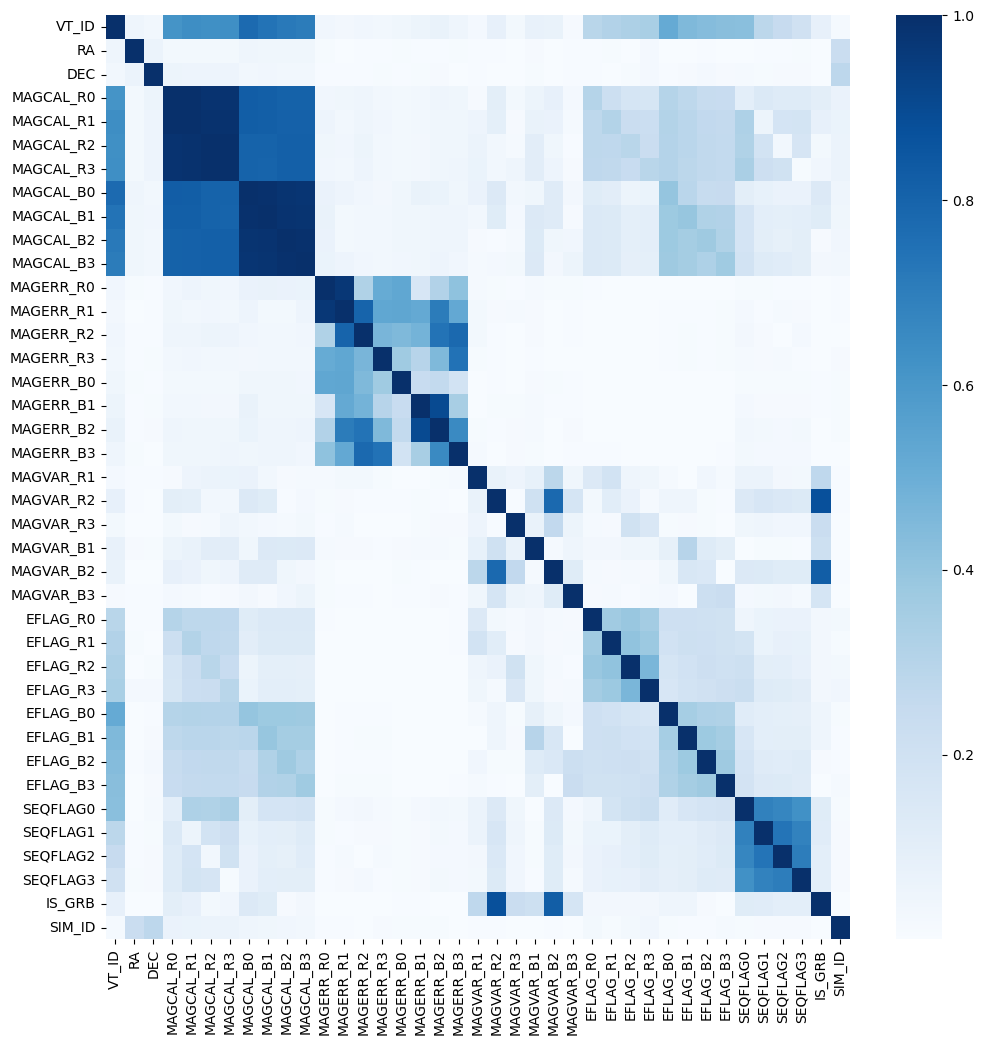

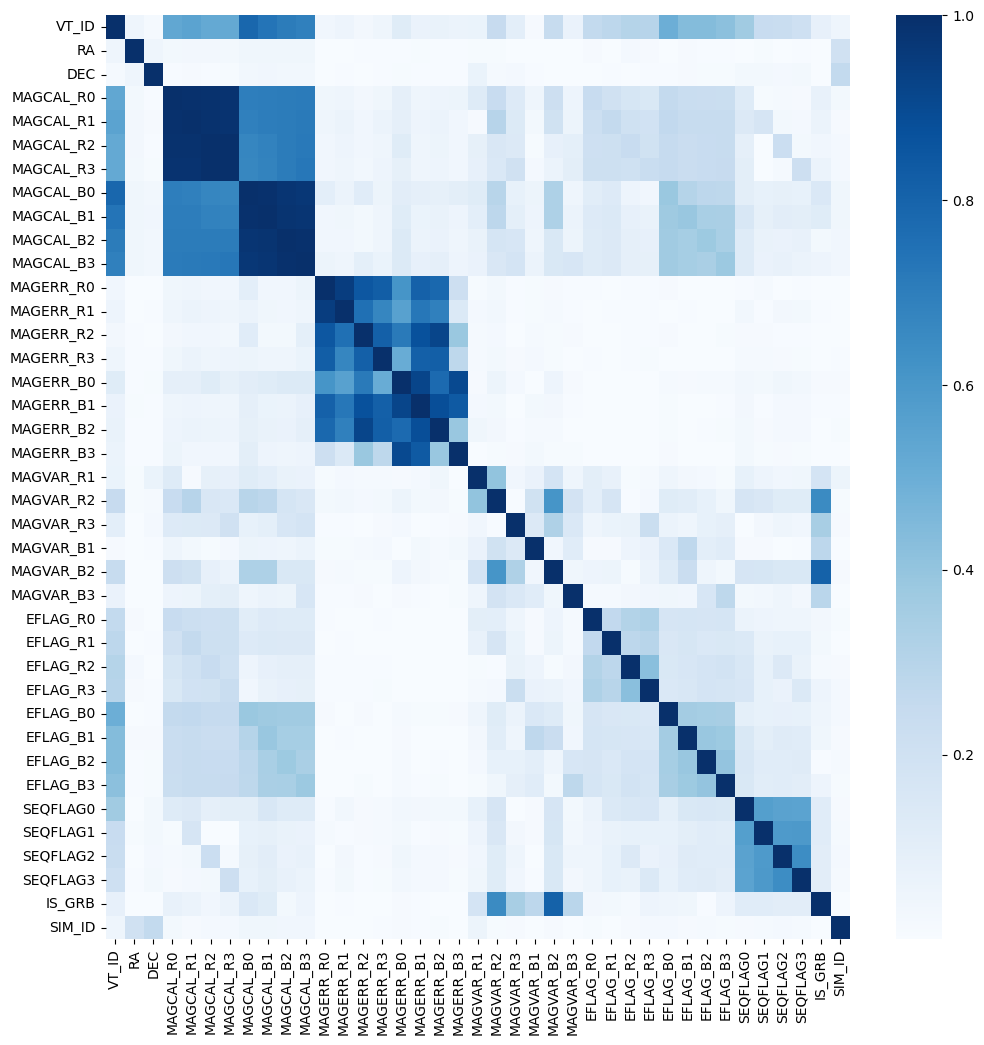

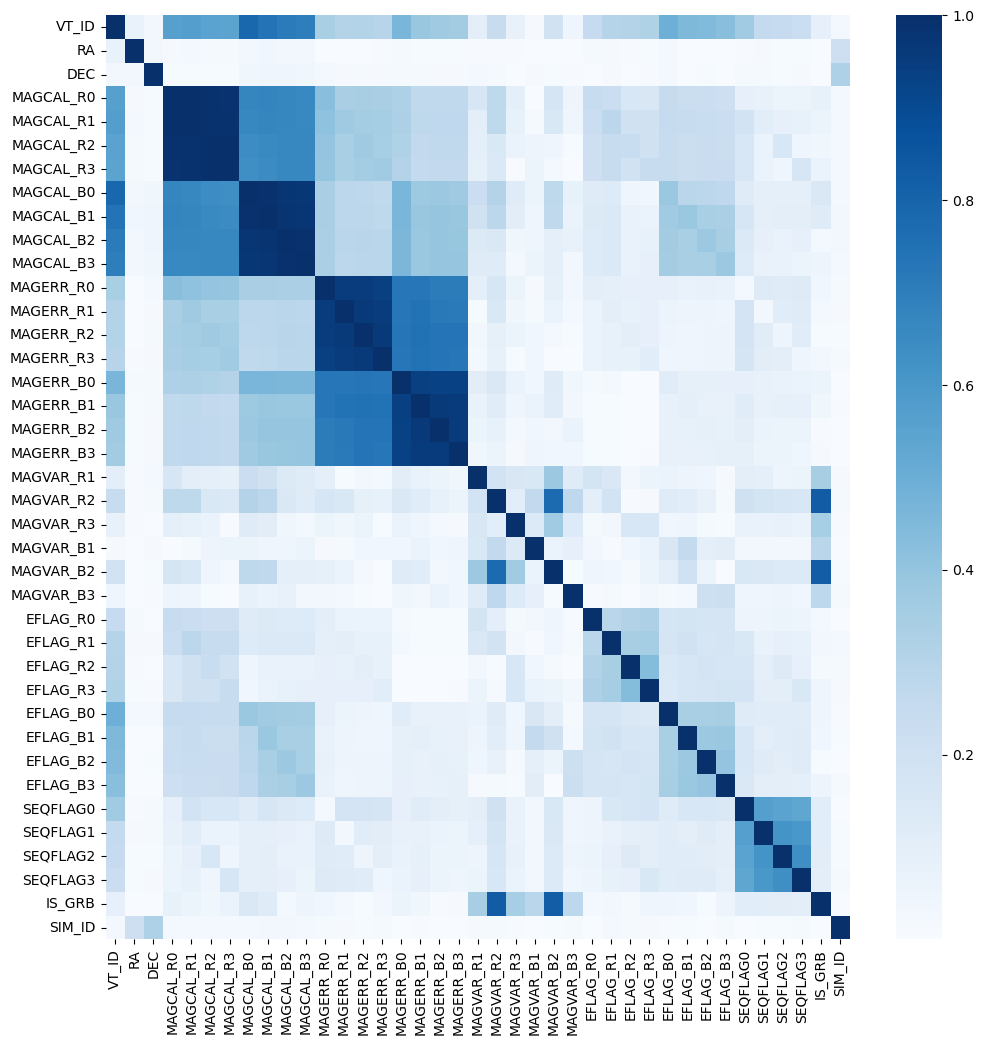

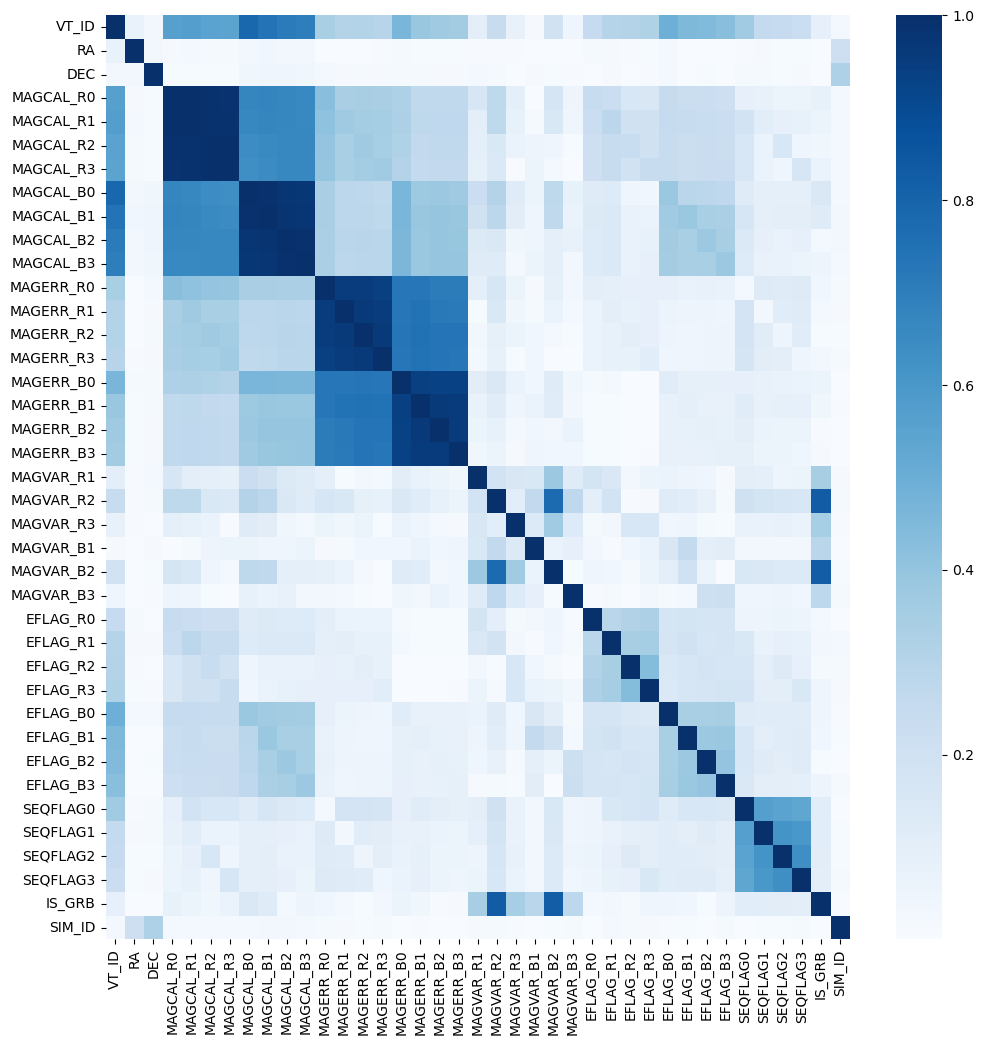

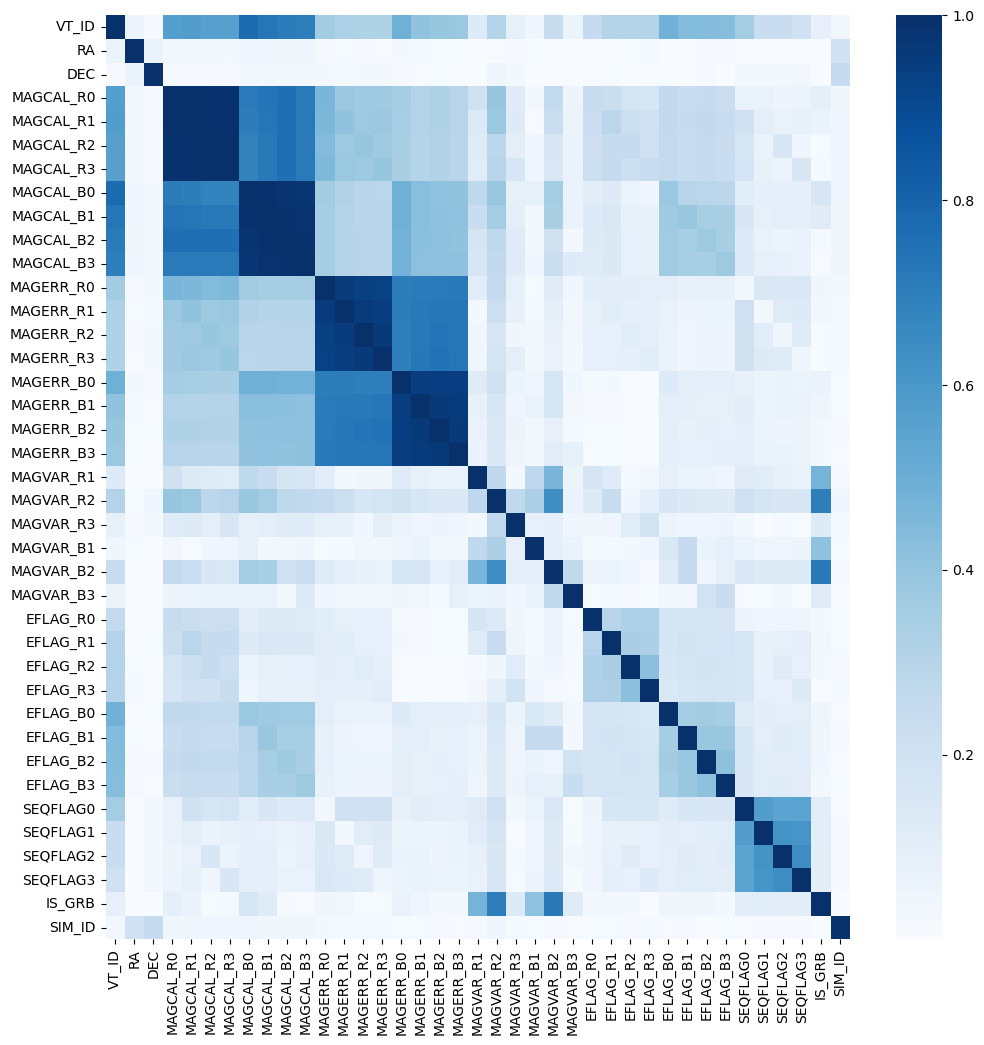

In [10]:
if os.path.isdir('plots/corr/'):
    shutil.rmtree('plots/corr/')
os.mkdir('plots/corr/')

for case, sub_data in cases_dict.items():
    plt.figure(figsize=(12,12))
    corr_matrix = sub_data.corr()
    sns.heatmap(abs(corr_matrix), cmap='Blues')
    plt.savefig('plots/corr/'+case+'corrolation')
    plt.show()

### Principal Component Analysis

In [11]:
# from sklearn.preprocessing import StandardScaler
# from numpy.linalg import eig
# 
# data_prediction = data.drop(["CASE", "IS_GRB"],
              # axis=1, inplace=False)
# 
# # centering adn normalizing the columns 
# x = StandardScaler().fit_transform(
    # data_prediction)
# # calculating covariance matrix
# x_cov = np.cov(x.T)
# 
# # getting eigenvalues and eigenvectors
# eig_vals, eig_vecs = eig(x_cov)
# 
# # sort values in increasing order 
# idx = eig_vals.argsort()[::-1]   
# eig_vals = eig_vals[idx]
# eig_vecs = eig_vecs[:,idx]
# 
# # make a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
# 
# # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
# eig_pairs.sort(key=lambda x: x[0], reverse=True)
# 
# # For further usage
# eig_vals_sorted = np.array([x[0] for x in eig_pairs])
# eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
# 
# # find thereshold value for explaining variance 
# explained_variance = eig_vals_sorted/np.sum(eig_vals_sorted)
# cum_explained_variance = np.cumsum(explained_variance)
# threshold = 0.9
# n_components = np.argmax(cum_explained_variance >= threshold) + 1
# 
# eig_vals_reduced = eig_vals_sorted[:n_components]
# eig_vecs_reduced = eig_vecs_sorted[:, :n_components]
# 
# # project the reduced eigenvector matrix on data
# projected_data = np.dot(data_prediction, eig_vecs_reduced)
# 

## Random Forest Model


Classifying using a random forest model. See doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Tuning Model

In [125]:

# X = StandardScaler().fit_transform(
    # projected_data)
#X = data[[
#    "MAGCAL_R0",
#    "MAGCAL_B0",
#    "MAGCAL_R1",
#    "MAGCAL_B1",
#    "MAGVAR_R1",
#    "MAGVAR_B1",b
#    "MAGERR_R0",
#    "MAGERR_R1",
#    "MAGERR_B0",
#    "MAGERR_B1",
#    "R0_B0", 
#    "R1_B1",
#    "IS_GRB"]]
#X = data.drop(["CASE"], axis = 1).dropna()
#X = data[[
#"MAGCAL_R0", 
#"MAGCAL_B0",    
#"MAGCAL_R1", 
#"MAGCAL_B1",    
#"IS_GRB"          
#]].dropna()
#X = data.drop("CASE", axis=1).dropna() # Not sure this is the best way to handle missing values 
X = data.dropna()[[
    "MAGCAL_R0",
    "MAGCAL_B0",
    "MAGERR_R0",
    "MAGERR_B0",
    "MAGCAL_R1",
    "MAGCAL_B1",
    "MAGERR_R1",
    "MAGERR_B1",
    "MAGVAR_R1",
    "MAGVAR_B1",

]]
y = data.dropna()["IS_GRB"]

param_grid = {
    'n_estimators': [100],
    'max_depth': [4],
    'min_samples_split': [2, 3]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight=class_dict), param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.3s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.4s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.2s
Best parameters:  {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.9999263495232379


KeyError: "None of [Index(['CASE'], dtype='object')] are in the [columns]"

### Fitting Model

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_, class_weight=class_dict)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
y_pred_proba = RFmodel.predict_proba(X_test)

In [24]:
print(y_pred_proba)

[[0.96033075 0.03966925]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [122]:
def run_grid_search(X, y, model, param_grid, cv=5):
    grid_search = GridSearchCV(model,
                               param_grid=param_grid,
                               cv=cv,
                               verbose=2)
    grid_search.fit(X, y)
    return grid_search

In [127]:
run_grid_search(X_train, y_train, RandomForestClassifier(), param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END .max_depth=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   1.8s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.0s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.0s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   2.2s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   1.8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4], 'min_samples_split': [2, 3],
                         'n_estimators': [100]},
             verbose=2)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(conf_matrix)

[[29644     0]
 [    0   182]]


### Feature Importance


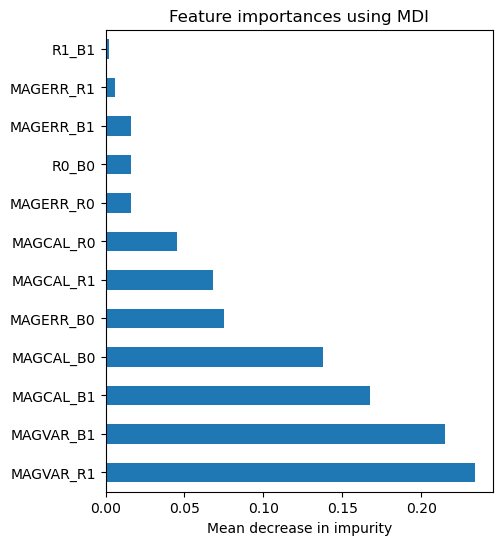

In [32]:
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,6))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
plt.show()

### Visualizing the Random Forestfrom sklearn.tree import export_graphviz

The RandomForestModel consists of `n_estimators` DecisionTreeModel. To visualize each tree the `plot_tree` attribute can be used, see below:

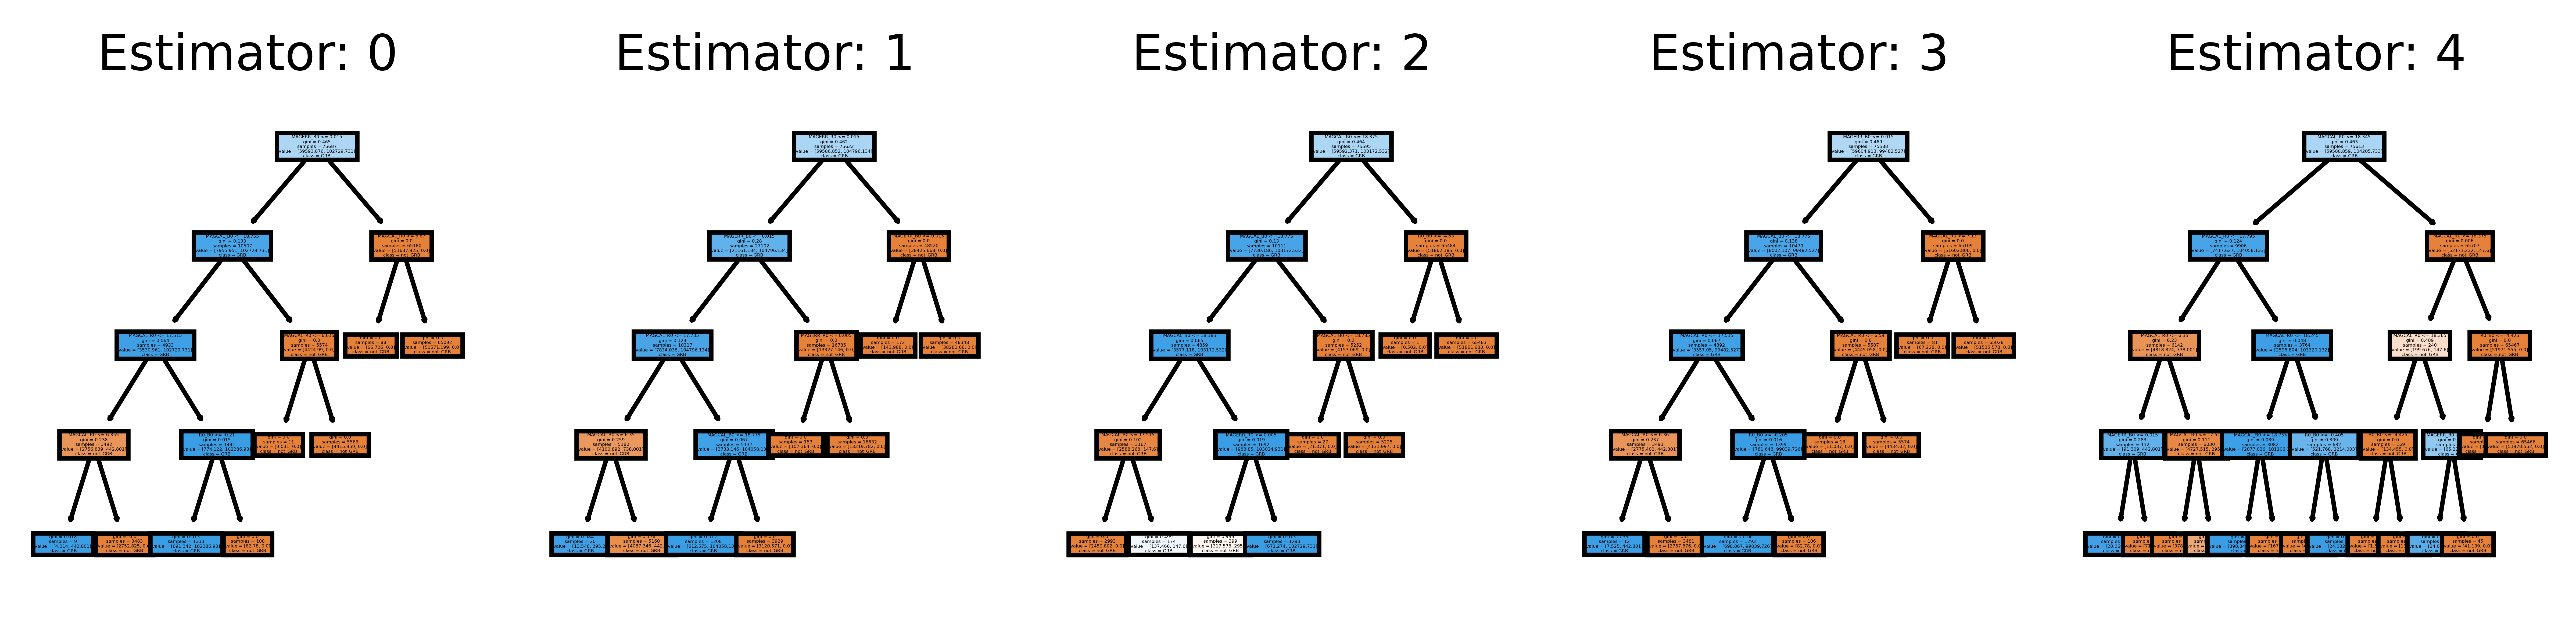

In [18]:
from sklearn import tree
fn=list(X.columns)
cn=["not_GRB", "GRB"]
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=1200)
for index in range(0, 5):
    tree.plot_tree(RFmodel.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

Moreover, the `dtreeviz` package can provide a more detailed and visual representation of the decision tree

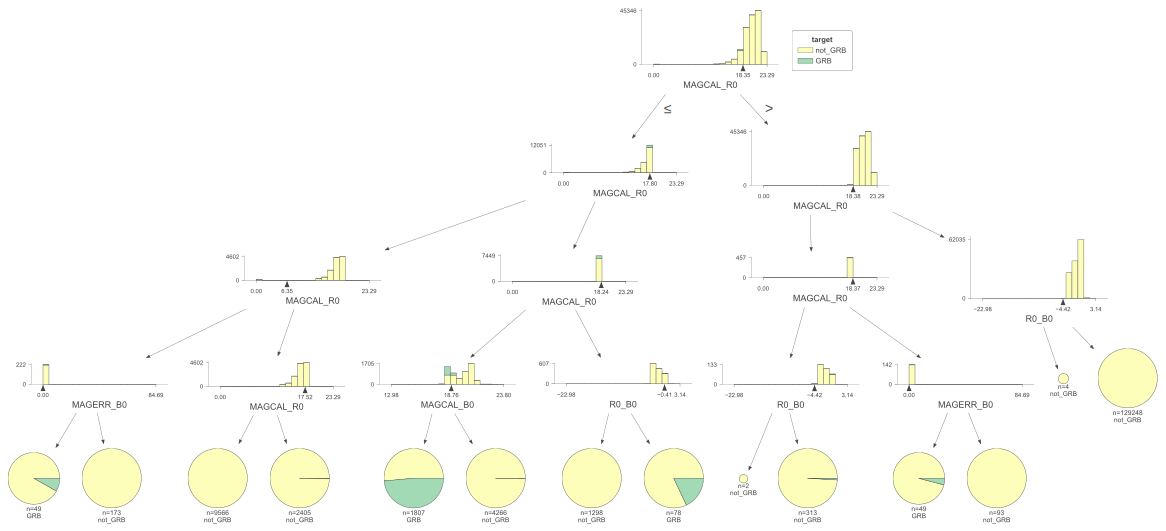

In [19]:
import dtreeviz 
for index in range(0, 5):
    trees=[]
    trees.append(dtreeviz.model(RFmodel.estimators_[index], X, y,
        target_name="target",
        feature_names=fn,
        class_names=cn))

tree_index = 0    # the index of the tree to visualize        

trees[tree_index].view()
#trees[tree_index].view().save('Trees.svg')


<Axes: xlabel='MAGCAL_R0', ylabel='R0_B0'>

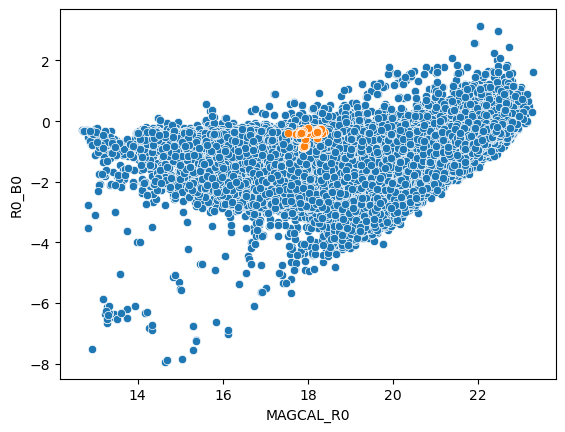

In [20]:
data = data[data["MAGCAL_R0"]>1]
data["R0_B0"] = data["MAGCAL_R0"]-data["MAGCAL_B0"]

#plt.scatter(data["R0_B0"], data["MAGCAL_R0"], )
mask = data["IS_GRB"] == 1 
sns.scatterplot(data=data, y = "R0_B0", x = "MAGCAL_R0")
sns.scatterplot(data=data[mask], y = "R0_B0", x = "MAGCAL_R0")


- Look at PCA (done not great)
- New flags ??
- Class imbalance: dealt with using class weights class from sklearn

- Cleanup pipeline


In [103]:
import yaml
import os

with open('/Users/jeremypalmerio/Repos/VTAC_ML/GRB-hunter/config/config.yaml', 'r') as file:
    data = yaml.safe_load(file)
config = yaml.safe_load(open('/Users/jeremypalmerio/Repos/VTAC_ML/GRB-hunter/config/config.yaml', 'r'))

print(data) 


# Output:
# {'example': 'data'}

{'paths': {'plots': 'plots/corr/', 'data': '~/Repos/VTAC_ML/combined_qpo_vt_with_GRB.parquet', 'model': 'RFModel'}, 'Inputs': {'path': '~/Repos/VTAC_ML/combined_qpo_vt_with_GRB.parquet', 'columns': ['MAGCAL_R0', 'MAGCAL_B0', 'MAGERR_R0', 'MAGERR_B0', 'MAGCAL_R1', 'MAGCAL_B1', 'MAGERR_R1', 'MAGERR_B1', 'MAGVAR_R1', 'MAGVAR_B1', 'R0_B0', 'R1_B1'], 'target_column': ['IS_GRB']}, 'RFModel': {'param_grid': {'n_estimators': [100], 'max_depth': [4], 'min_samples_split': [2, 3]}}, 'OtherModel': [None]}


In [105]:
config['RFModel']['param_grid']

{'n_estimators': [100], 'max_depth': [4], 'min_samples_split': [2, 3]}